# Численные методы

## Лабораторная работа 3

### Вариант 1

### Студент: Тимофеенко Никита

#### Задание 1.


![](2023-04-10_17-38-20.png)

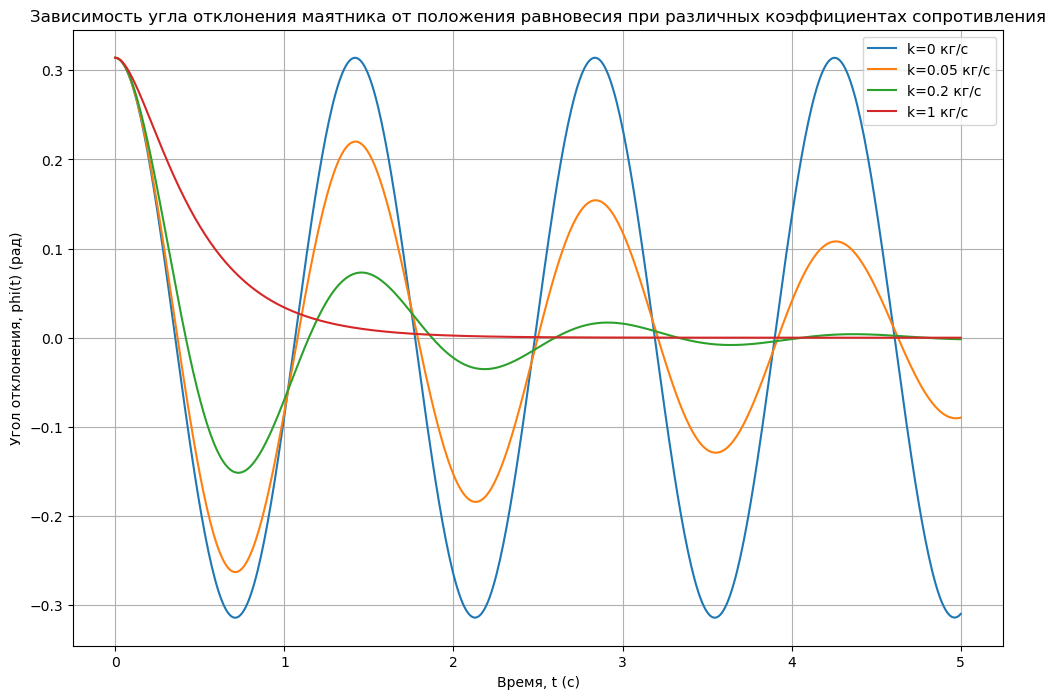

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def pendulum_equation(t, y, k, m, L, g=9.81):
	""" Уравнение маятника """								# Так как в Python нельзя решить ДУ второго порядка на прямую,
	phi, omega = y											# ДУ 2 порядка необходимо разбить на систему 2 уравнений первого порядка для этого вводятся новые переменные
	dydt = [omega, - k / m * omega - g / L * phi]			# omega = dphi / dt, domega / dt = - k / m * omega - g / L * phi
	return dydt


# Начальные условия и параметры
phi0 = np.pi / 10
omega0 = 0
m = 0.1
L = 0.5
k_values = [0, 0.05, 0.2, 1]
tmax = 5


# Функция для численного решения уравнения движения маятника
def solve_pendulum(k, m, L, phi0, omega0, tmax):
	""" Решение уравнения маятника с заданными начальными условиями """
	sol = solve_ivp(pendulum_equation, [0, tmax], [phi0, omega0], args=(k, m, L), dense_output=True)
	return sol


# Решение уравнений движения и построение графиков
plt.figure(figsize=(12, 8))
t = np.linspace(0, tmax, 500)


for k in k_values:
	sol = solve_pendulum(k, m, L, phi0, omega0, tmax)
	phi = sol.sol(t)[0]
	plt.plot(t, phi, label=f'k={k} кг/с')


plt.xlabel('Время, t (с)')
plt.ylabel('Угол отклонения, phi(t) (рад)')
plt.title('Зависимость угла отклонения маятника от положения равновесия при различных коэффициентах сопротивления')
plt.legend()
plt.grid()
plt.show()

#### Задание 2.

![](2023-04-10_17-38-42.png)

In [5]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp

def pendulum_equation(t, y, k, m, L, g=9.81):
	theta, omega = y
	dydt = [omega, -(g/L) * theta - (k/m) * omega]
	return dydt

def find_period(sol, theta0):
	t_crossings = []
	for i in range(1, len(sol.t) - 1):
		if sol.y[0, i] >= theta0 and sol.y[0, i-1] < theta0 and sol.y[1, i] > 0:
			t_crossings.append(sol.t[i])
	if len(t_crossings) >= 2:
		period = t_crossings[1] - t_crossings[0]
	else:
		period = np.nan
	return period

# Начальные условия и параметры
omega0 = 0
m = 0.1
L = 0.5
k_values = [0, 0.05, 0.2, 1]
phi0_values = [5 * np.pi / 6, np.pi / 2, np.pi / 6, np.pi / 10]
tmax = 50

# Создание таблиц
table1 = pd.DataFrame(index=k_values, columns=['T'])
table2 = pd.DataFrame(index=phi0_values, columns=['T'])

# Расчет периодов для различных значений k и фиксированного начального отклонения
theta0 = np.pi / 10
for k in k_values:
	sol = solve_ivp(pendulum_equation, [0, tmax], [theta0, omega0], args=(k, m, L), rtol=1e-6, atol=1e-8)
	period = find_period(sol, theta0)
	table1.loc[k, 'T'] = period

# Расчет периодов для различных начальных отклонений и фиксированного значения k
k = 0.05
for phi0 in phi0_values:
	sol = solve_ivp(pendulum_equation, [0, tmax], [phi0, omega0], args=(k, m, L), rtol=1e-6, atol=1e-8)
	period = find_period(sol, phi0)
	table2.loc[phi0, 'T'] = period

print("Таблица 1:")
print(table1)

print("\nТаблица 2:")
print(table2)

Таблица 1:
        T
0.00  NaN
0.05  NaN
0.20  NaN
1.00  NaN

Таблица 2:
            T
2.617994  NaN
1.570796  NaN
0.523599  NaN
0.314159  NaN


#### Задание 1.

![](merge_from_ofoct.png)

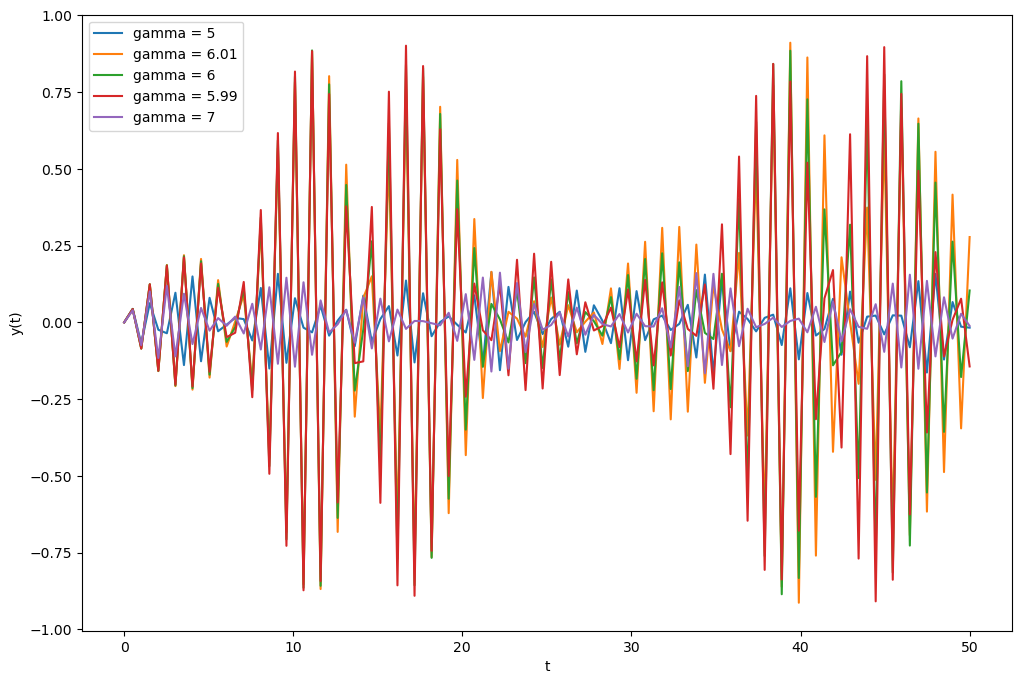

In [56]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def eq_system(x, y, w, gamma):
	""" ДУ 2 порядка """
	dydt = [y[1], - w ** 2 * np.sin(y[0]) + np.sin(gamma * x)]				# y[0] = y, y[1] = y'
	return dydt																# y[0]' = y[1], y[1]' = - w ** 2 * np.sin(y[0]) + np.sin(gamma * x)

y0 = [0, 0]
t_span = [0, 50]
t_eval = np.linspace(t_span[0], t_span[1], 100)

w = 6																		# gamma < w				w - 1 = 5
epsilon = 0.01																# gamma < w + epsilon	w + epsilon = 6.01
gamma_values = [w - 1, w + epsilon, w, w - epsilon, w + 1]					# gamma = w				w = 6
																			# gamma = w - epsilon	w - epsilon = 5.99
																			# gamma > w				w + 1 = 7

fig, ax = plt.subplots(figsize=(12, 8))
for gamma in gamma_values:
	sol = solve_ivp(eq_system, t_span, y0, args=(w, gamma), t_eval=t_eval)
	ax.plot(sol.t, sol.y[0], label=f"gamma = {gamma}")

ax.set_xlabel("t")
ax.set_ylabel("y(t)")
ax.legend()
plt.show()

#### Задание 2.

![](2023-04-10_17-58-57.png)

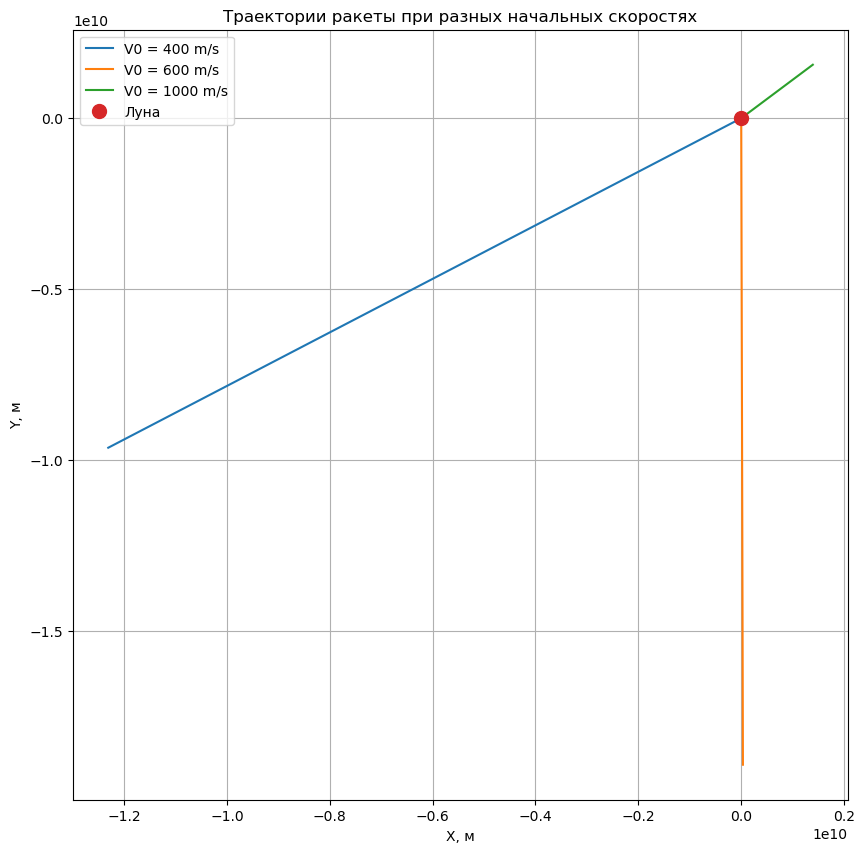

In [4]:
import math
import matplotlib.pyplot as plt



# Константы
G = 6.67430e-11 				# Гравитационная постоянная
m_moon = 7.3e22 				# Масса Луны
r_moon = 1.7e6 					# Радиус Луны
m_rocket = 10000 				# Масса ракеты
a = 1e6 						# Расстояние до Луны
p0 = 1e6 						# Прицельное расстояние
dt = 20 					 	# Шаг времени
v0_values = [400, 600, 1000] 	# Начальные скорости


# Функция для расчета траектории ракеты
def calculate_trajectory(v0):
	x, y = a, 0
	vx, vy = 0, v0
	trajectory = [[x, y]]

	for _ in range(50000):
		r = math.sqrt(x**2 + y**2)
		fx = -G * m_moon * m_rocket * x / r**3
		fy = -G * m_moon * m_rocket * y / r**3
		vx += fx / m_rocket * dt
		vy += fy / m_rocket * dt
		x += vx * dt
		y += vy * dt
		trajectory.append([x, y])
	return trajectory

# Расчет траекторий для разных начальных скоростей и построение графиков
plt.figure(figsize=(10, 10))
for v0 in v0_values:
	trajectory = calculate_trajectory(v0)
	x_values = [point[0] for point in trajectory]
	y_values = [point[1] for point in trajectory]
	plt.plot(x_values, y_values, label=f'V0 = {v0} m/s')

plt.plot(0, 0, 'o', label='Луна', markersize=10)
plt.title('Траектории ракеты при разных начальных скоростях')
plt.xlabel('X, м')
plt.ylabel('Y, м')
plt.legend()
plt.grid()
plt.show()

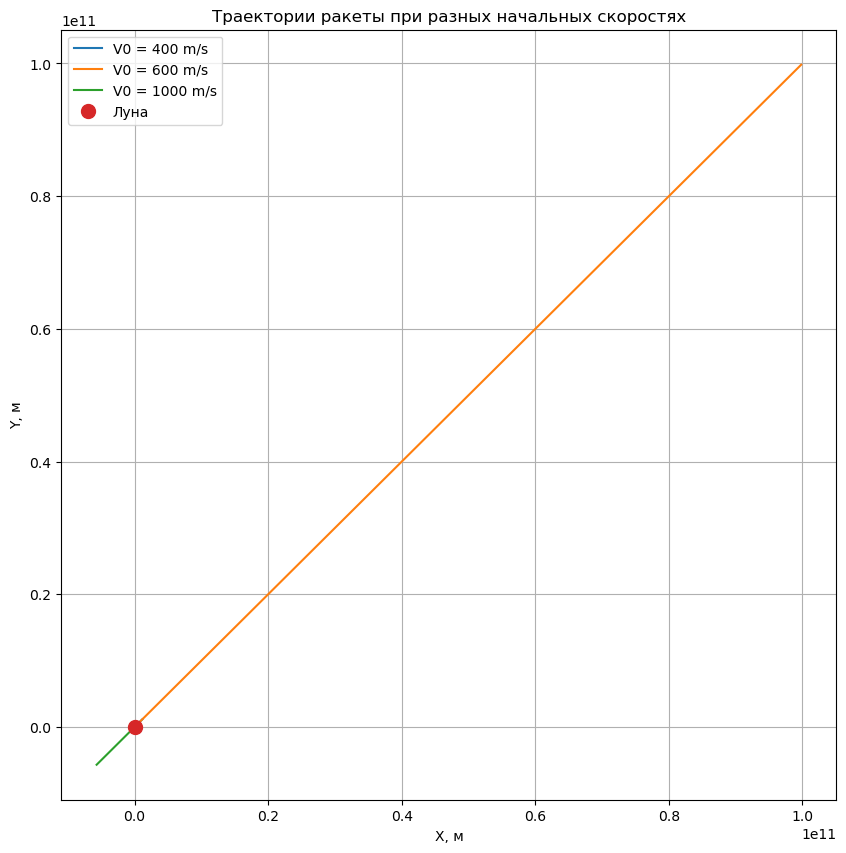

In [5]:
import math
import matplotlib.pyplot as plt

# Константы
G = 6.67430e-11 # Гравитационная постоянная
m_moon = 7.3e22 # Масса Луны
r_moon = 1.7e6 # Радиус Луны
m_rocket = 10000 # Масса ракеты
a = 1e6 # Расстояние до Луны
p0 = 1e6 # Прицельное расстояние
dt = 20 # Шаг времени
v0_values = [400, 600, 1000] # Начальные скорости

# Функция для расчета траектории ракеты
def calculate_trajectory(v0):
	x, y = -a * math.cos(math.radians(45)), -a * math.sin(math.radians(45))
	vx, vy = v0 * math.cos(math.radians(45)), v0 * math.sin(math.radians(45))
	trajectory = [[x, y]]
	for _ in range(5000):
		r = math.sqrt(x**2 + y**2)
		fx = -G * m_moon * m_rocket * x / r**3
		fy = -G * m_moon * m_rocket * y / r**3
		vx += fx / m_rocket * dt
		vy += fy / m_rocket * dt
		x += vx * dt
		y += vy * dt
		trajectory.append([x, y])
	return trajectory

# Расчет траекторий для разных начальных скоростей и построение графиков
plt.figure(figsize=(10, 10))
for v0 in v0_values:
	trajectory = calculate_trajectory(v0)
	x_values = [point[0] for point in trajectory]
	y_values = [point[1] for point in trajectory]
	plt.plot(x_values, y_values, label=f'V0 = {v0} m/s')

plt.plot(0, 0, 'o', label='Луна', markersize=10)
plt.title('Траектории ракеты при разных начальных скоростях')
plt.xlabel('X, м')
plt.ylabel('Y, м')
plt.legend()
plt.grid()
plt.show()